In [1]:
import pystare as ps

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy.crs as ccrs

import numpy

In [2]:
def divert_stderr():
    sys.stderr = open('stderr.out','w')  
    return

def restore_stderr():
    sys.stderr.close()
    with open('stderr.out') as f:
        count = sum(1 for _ in f)
    if count > 0:
        print(count, 'warnings or errors encountered while stderr diverted. See stderr.out.')
    sys.stderr = sys.__stderr__
    return

In [3]:
# Some helper functions for plotting & printing.

class figax_container(object):
    def __init__(self,figax):
        self.fig = figax[0]
        self.ax  = figax[1]
        return

def add_coastlines(figax,set_global=False):
    "Add coastlines to the plot."
    ax = figax.ax
    if set_global:
        ax.set_global()
    ax.coastlines()
    return figax

def hello_plot(
        spatial_index_values=None
        ,figax=None
        ,plot_options={'projection':ccrs.PlateCarree(),'transform':ccrs.Geodetic()}
        ,set_global=False
        ,show=True
        ):

    if figax is None:
        figax = figax_container(plt.subplots(1,subplot_kw=plot_options))
        if set_global:
            figax.ax.set_global()
        figax.ax.coastlines()
    else:
        ax = figax.ax
    
    if spatial_index_values is not None:
        # Calculate vertices and interconnection matrix
        lons,lats,intmat = ps.triangulate_indices(spatial_index_values)
        # Make triangulation object & plot
        siv_triang = tri.Triangulation(lons,lats,intmat)
        figax.ax.triplot(siv_triang,transform=plot_options['transform'])
    
    if show:
        plt.show()
        
    return figax

def hex16(i):
    return "0x%016x"%i

km = 1 # Unit of length
deg = 1 # Unit of angle

# Set up the projection and transformation
proj         = ccrs.PlateCarree()
# proj        = ccrs.Robinson() # Drives matplotlib bug.
# proj        = ccrs.Mollweide() # Drives matplotlib bug.
transf       = ccrs.Geodetic()
plot_options = {'projection':proj,'transform':transf}

default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = 1.5*default_dpi

In [5]:
clat_clon=[
    [60.000,-44.375]
    ,[60.000,-43.750]
    ,[60.000,-43.125]
    ,[60.500,-45.000]
    ,[60.500,-44.375]
    ,[60.500,-43.750]
    ,[60.500,-43.125]
    ,[61.000,-48.750]
    ,[61.000,-48.125]
    ,[61.000,-47.500]
    ,[61.000,-46.875]
    ,[61.000,-46.250]
    ,[61.000,-45.625]
    ,[61.000,-45.000]
    ,[61.000,-44.375]
    ,[61.000,-43.750]
    ,[61.000,-43.125]
    ,[61.000,-42.500]
    ,[61.500,-48.750]
    ,[61.500,-48.125]
    ,[61.500,-47.500]
    ,[61.500,-46.875]
    ,[61.500,-46.250]
    ,[61.500,-45.625]
    ,[61.500,-45.000]
    ,[61.500,-44.375]
    ,[61.500,-43.750]
    ,[61.500,-43.125]
    ,[61.500,-42.500]
    ,[62.000,-48.750]
    ,[62.000,-48.125]
    ,[62.000,-47.500]
    ,[62.000,-46.875]
    ,[62.000,-46.250]
    ,[62.000,-45.625]
    ,[62.000,-45.000]
    ,[62.000,-44.375]
    ,[62.000,-43.750]
    ,[62.000,-43.125]
    ,[62.000,-42.500]
    ,[62.000,-41.875]
    ,[62.500,-50.000]
    ,[62.500,-49.375]
    ,[62.500,-48.750]
    ,[62.500,-48.125]
    ,[62.500,-47.500]
    ,[62.500,-46.875]
    ,[62.500,-46.250]
    ,[62.500,-45.625]
    ,[62.500,-45.000]
    ,[62.500,-44.375]
    ,[62.500,-43.750]
    ,[62.500,-43.125]
    ,[62.500,-42.500]
    ,[63.000,-50.000]
    ,[63.000,-49.375]
    ,[63.000,-48.750]
    ,[63.000,-48.125]
    ,[63.000,-47.500]
    ,[63.000,-46.875]
    ,[63.000,-46.250]
    ,[63.000,-45.625]
    ,[63.000,-45.000]
    ,[63.000,-44.375]
    ,[63.000,-43.750]
    ,[63.000,-43.125]
    ,[63.000,-42.500]
    ,[63.000,-41.875]
    ,[63.000,-41.250]
    ,[63.500,-51.250]
    ,[63.500,-50.625]
    ,[63.500,-50.000]
    ,[63.500,-49.375]
    ,[63.500,-48.750]
    ,[63.500,-48.125]
    ,[63.500,-47.500]
    ,[63.500,-46.875]
    ,[63.500,-46.250]
    ,[63.500,-45.625]
    ,[63.500,-45.000]
    ,[63.500,-44.375]
    ,[63.500,-43.750]
    ,[63.500,-43.125]
    ,[63.500,-42.500]
    ,[63.500,-41.875]
    ,[63.500,-41.250]
    ,[63.500,-40.625]
    ,[64.000,-51.875]
    ,[64.000,-51.250]
    ,[64.000,-50.625]
    ,[64.000,-50.000]
    ,[64.000,-49.375]
    ,[64.000,-48.750]
    ,[64.000,-48.125]
    ,[64.000,-47.500]
    ,[64.000,-46.875]
    ,[64.000,-46.250]
    ,[64.000,-45.625]
    ,[64.000,-45.000]
    ,[64.000,-44.375]
    ,[64.000,-43.750]
    ,[64.000,-43.125]
    ,[64.000,-42.500]
    ,[64.000,-41.875]
    ,[64.000,-41.250]
    ,[64.000,-40.625]
    ,[64.500,-50.000]
    ,[64.500,-49.375]
    ,[64.500,-48.750]
    ,[64.500,-48.125]
    ,[64.500,-47.500]
    ,[64.500,-46.875]
    ,[64.500,-46.250]
    ,[64.500,-45.625]
    ,[64.500,-45.000]
    ,[64.500,-44.375]
    ,[64.500,-43.750]
    ,[64.500,-43.125]
    ,[64.500,-42.500]
    ,[64.500,-41.875]
    ,[64.500,-41.250]
    ,[64.500,-40.625]
    ,[64.500,-40.000]
    ,[65.000,-50.625]
    ,[65.000,-50.000]
    ,[65.000,-49.375]
    ,[65.000,-48.750]
    ,[65.000,-48.125]
    ,[65.000,-47.500]
    ,[65.000,-46.875]
    ,[65.000,-46.250]
    ,[65.000,-45.625]
    ,[65.000,-45.000]
    ,[65.000,-44.375]
    ,[65.000,-43.750]
    ,[65.000,-43.125]
    ,[65.000,-42.500]
    ,[65.000,-41.875]
    ,[65.000,-41.250]
    ,[65.000,-40.625]
    ,[65.000,-40.000]
    ,[65.500,-53.125]
    ,[65.500,-52.500]
    ,[65.500,-51.875]
    ,[65.500,-50.625]
    ,[65.500,-50.000]
    ,[65.500,-49.375]
    ,[65.500,-48.750]
    ,[65.500,-48.125]
    ,[65.500,-47.500]
    ,[65.500,-46.875]
    ,[65.500,-46.250]
    ,[65.500,-45.625]
    ,[65.500,-45.000]
    ,[65.500,-44.375]
    ,[65.500,-43.750]
    ,[65.500,-43.125]
    ,[65.500,-42.500]
    ,[65.500,-41.875]
    ,[65.500,-41.250]
    ,[65.500,-40.625]
    ,[65.500,-40.000]
    ,[65.500,-39.375]
    ,[65.500,-38.750]
    ,[65.500,-38.125]
    ,[65.500,-37.500]
    ,[66.000,-53.750]
    ,[66.000,-53.125]
    ,[66.000,-52.500]
    ,[66.000,-51.875]
    ,[66.000,-51.250]
    ,[66.000,-50.625]
    ,[66.000,-50.000]
    ,[66.000,-49.375]
    ,[66.000,-48.750]
    ,[66.000,-48.125]
    ,[66.000,-47.500]
    ,[66.000,-46.875]
    ,[66.000,-46.250]
    ,[66.000,-45.625]
    ,[66.000,-45.000]
    ,[66.000,-44.375]
    ,[66.000,-43.750]
    ,[66.000,-43.125]
    ,[66.000,-42.500]
    ,[66.000,-41.875]
    ,[66.000,-41.250]
    ,[66.000,-40.625]
    ,[66.000,-40.000]
    ,[66.000,-39.375]
    ,[66.000,-38.750]
    ,[66.000,-38.125]
    ,[66.000,-37.500]
    ,[66.000,-36.875]
    ,[66.000,-36.250]
    ,[66.000,-35.625]
    ,[66.500,-53.750]
    ,[66.500,-53.125]
    ,[66.500,-52.500]
    ,[66.500,-51.875]
    ,[66.500,-51.250]
    ,[66.500,-50.000]
    ,[66.500,-49.375]
    ,[66.500,-48.750]
    ,[66.500,-48.125]
    ,[66.500,-47.500]
    ,[66.500,-46.875]
    ,[66.500,-46.250]
    ,[66.500,-45.625]
    ,[66.500,-45.000]
    ,[66.500,-44.375]
    ,[66.500,-43.750]
    ,[66.500,-43.125]
    ,[66.500,-42.500]
    ,[66.500,-41.875]
    ,[66.500,-41.250]
    ,[66.500,-40.625]
    ,[66.500,-40.000]
    ,[66.500,-39.375]
    ,[66.500,-38.750]
    ,[66.500,-38.125]
    ,[66.500,-37.500]
    ,[66.500,-36.875]
    ,[66.500,-36.250]
    ,[66.500,-35.625]
    ,[66.500,-35.000]
    ,[66.500,-34.375]
    ,[67.000,-53.125]
    ,[67.000,-52.500]
    ,[67.000,-50.625]
    ,[67.000,-50.000]
    ,[67.000,-49.375]
    ,[67.000,-48.750]
    ,[67.000,-48.125]
    ,[67.000,-47.500]
    ,[67.000,-46.875]
    ,[67.000,-46.250]
    ,[67.000,-45.625]
    ,[67.000,-45.000]
    ,[67.000,-44.375]
    ,[67.000,-43.750]
    ,[67.000,-43.125]
    ,[67.000,-42.500]
    ,[67.000,-41.875]
    ,[67.000,-41.250]
    ,[67.000,-40.625]
    ,[67.000,-40.000]
    ,[67.000,-39.375]
    ,[67.000,-38.750]
    ,[67.000,-38.125]
    ,[67.000,-37.500]
    ,[67.000,-36.875]
    ,[67.000,-36.250]
    ,[67.000,-35.625]
    ,[67.000,-35.000]
    ,[67.000,-34.375]
    ,[67.000,-33.750]
    ,[67.500,-53.125]
    ,[67.500,-52.500]
    ,[67.500,-50.000]
    ,[67.500,-49.375]
    ,[67.500,-48.750]
    ,[67.500,-48.125]
    ,[67.500,-47.500]
    ,[67.500,-46.875]
    ,[67.500,-46.250]
    ,[67.500,-45.625]
    ,[67.500,-45.000]
    ,[67.500,-44.375]
    ,[67.500,-43.750]
    ,[67.500,-43.125]
    ,[67.500,-42.500]
    ,[67.500,-41.875]
    ,[67.500,-41.250]
    ,[67.500,-40.625]
    ,[67.500,-40.000]
    ,[67.500,-39.375]
    ,[67.500,-38.750]
    ,[67.500,-38.125]
    ,[67.500,-37.500]
    ,[67.500,-36.875]
    ,[67.500,-36.250]
    ,[67.500,-35.625]
    ,[67.500,-35.000]
    ,[67.500,-34.375]
    ,[67.500,-33.750]
    ,[67.500,-33.125]
    ,[68.000,-50.625]
    ,[68.000,-50.000]
    ,[68.000,-49.375]
    ,[68.000,-48.750]
    ,[68.000,-48.125]
    ,[68.000,-47.500]
    ,[68.000,-46.875]
    ,[68.000,-46.250]
    ,[68.000,-45.625]
    ,[68.000,-45.000]
    ,[68.000,-44.375]
    ,[68.000,-43.750]
    ,[68.000,-43.125]
    ,[68.000,-42.500]
    ,[68.000,-41.875]
    ,[68.000,-41.250]
    ,[68.000,-40.625]
    ,[68.000,-40.000]
    ,[68.000,-39.375]
    ,[68.000,-38.750]
    ,[68.000,-38.125]
    ,[68.000,-37.500]
    ,[68.000,-36.875]
    ,[68.000,-36.250]
    ,[68.000,-35.625]
    ,[68.000,-35.000]
    ,[68.000,-34.375]
    ,[68.000,-33.750]
    ,[68.000,-33.125]
    ,[68.000,-32.500]
    ,[68.000,-31.875]
    ,[68.000,-31.250]
    ,[68.000,-30.625]
    ,[68.000,-30.000]
    ,[68.500,-51.250]
    ,[68.500,-50.625]
    ,[68.500,-50.000]
    ,[68.500,-49.375]
    ,[68.500,-48.750]
    ,[68.500,-48.125]
    ,[68.500,-47.500]
    ,[68.500,-46.875]
    ,[68.500,-46.250]
    ,[68.500,-45.625]
    ,[68.500,-45.000]
    ,[68.500,-44.375]
    ,[68.500,-43.750]
    ,[68.500,-43.125]
    ,[68.500,-42.500]
    ,[68.500,-41.875]
    ,[68.500,-41.250]
    ,[68.500,-40.625]
    ,[68.500,-40.000]
    ,[68.500,-39.375]
    ,[68.500,-38.750]
    ,[68.500,-38.125]
    ,[68.500,-37.500]
    ,[68.500,-36.875]
    ,[68.500,-36.250]
    ,[68.500,-35.625]
    ,[68.500,-35.000]
    ,[68.500,-34.375]
    ,[68.500,-33.750]
    ,[68.500,-33.125]
    ,[68.500,-32.500]
    ,[68.500,-31.875]
    ,[68.500,-31.250]
    ,[68.500,-30.625]
    ,[68.500,-30.000]
    ,[68.500,-29.375]
    ,[68.500,-28.750]
    ,[68.500,-28.125]
    ,[68.500,-27.500]
    ,[68.500,-26.875]
    ,[69.000,-50.625]
    ,[69.000,-50.000]
    ,[69.000,-49.375]
    ,[69.000,-48.750]
    ,[69.000,-48.125]
    ,[69.000,-47.500]
    ,[69.000,-46.875]
    ,[69.000,-46.250]
    ,[69.000,-45.625]
    ,[69.000,-45.000]
    ,[69.000,-44.375]
    ,[69.000,-43.750]
    ,[69.000,-43.125]
    ,[69.000,-42.500]
    ,[69.000,-41.875]
    ,[69.000,-41.250]
    ,[69.000,-40.625]
    ,[69.000,-40.000]
    ,[69.000,-39.375]
    ,[69.000,-38.750]
    ,[69.000,-38.125]
    ,[69.000,-37.500]
    ,[69.000,-36.875]
    ,[69.000,-36.250]
    ,[69.000,-35.625]
    ,[69.000,-35.000]
    ,[69.000,-34.375]
    ,[69.000,-33.750]
    ,[69.000,-33.125]
    ,[69.000,-32.500]
    ,[69.000,-31.875]
    ,[69.000,-31.250]
    ,[69.000,-30.625]
    ,[69.000,-30.000]
    ,[69.000,-29.375]
    ,[69.000,-28.750]
    ,[69.000,-28.125]
    ,[69.000,-27.500]
    ,[69.000,-26.875]
    ,[69.000,-26.250]
    ,[69.000,-25.625]
    ,[69.500,-55.000]
    ,[69.500,-54.375]
    ,[69.500,-53.750]
    ,[69.500,-53.125]
    ,[69.500,-52.500]
    ,[69.500,-50.625]
    ,[69.500,-50.000]
    ,[69.500,-49.375]
    ,[69.500,-48.750]
    ,[69.500,-48.125]
    ,[69.500,-47.500]
    ,[69.500,-46.875]
    ,[69.500,-46.250]
    ,[69.500,-45.625]
    ,[69.500,-45.000]
    ,[69.500,-44.375]
    ,[69.500,-43.750]
    ,[69.500,-43.125]
    ,[69.500,-42.500]
    ,[69.500,-41.875]
    ,[69.500,-41.250]
    ,[69.500,-40.625]
    ,[69.500,-40.000]
    ,[69.500,-39.375]
    ,[69.500,-38.750]
    ,[69.500,-38.125]
    ,[69.500,-37.500]
    ,[69.500,-36.875]
    ,[69.500,-36.250]
    ,[69.500,-35.625]
    ,[69.500,-35.000]
    ,[69.500,-34.375]
    ,[69.500,-33.750]
    ,[69.500,-33.125]
    ,[69.500,-32.500]
    ,[69.500,-31.875]
    ,[69.500,-31.250]
    ,[69.500,-30.625]
    ,[69.500,-30.000]
    ,[69.500,-29.375]
    ,[69.500,-28.750]
    ,[69.500,-28.125]
    ,[69.500,-27.500]
    ,[69.500,-26.875]
    ,[69.500,-26.250]
    ,[69.500,-25.625]
    ,[69.500,-25.000]
    ,[69.500,-24.375]
    ,[70.000,-55.000]
    ,[70.000,-54.375]
    ,[70.000,-53.750]
    ,[70.000,-53.125]
    ,[70.000,-52.500]
    ,[70.000,-51.875]
    ,[70.000,-51.250]
    ,[70.000,-50.625]
    ,[70.000,-50.000]
    ,[70.000,-49.375]
    ,[70.000,-48.750]
    ,[70.000,-48.125]
    ,[70.000,-47.500]
    ,[70.000,-46.875]
    ,[70.000,-46.250]
    ,[70.000,-45.625]
    ,[70.000,-45.000]
    ,[70.000,-44.375]
    ,[70.000,-43.750]
    ,[70.000,-43.125]
    ,[70.000,-42.500]
    ,[70.000,-41.875]
    ,[70.000,-41.250]
    ,[70.000,-40.625]
    ,[70.000,-40.000]
    ,[70.000,-39.375]
    ,[70.000,-38.750]
    ,[70.000,-38.125]
    ,[70.000,-37.500]
    ,[70.000,-36.875]
    ,[70.000,-36.250]
    ,[70.000,-35.625]
    ,[70.000,-35.000]
    ,[70.000,-34.375]
    ,[70.000,-33.750]
    ,[70.000,-33.125]
    ,[70.000,-32.500]
    ,[70.000,-31.875]
    ,[70.000,-31.250]
    ,[70.000,-30.625]
    ,[70.000,-30.000]
    ,[70.000,-29.375]
    ,[70.000,-28.750]
    ,[70.000,-28.125]
    ,[70.000,-27.500]
    ,[70.000,-26.875]
    ,[70.000,-26.250]
    ,[70.000,-25.625]
    ,[70.000,-25.000]
    ,[70.000,-24.375]
    ,[70.000,-23.750]
    ,[70.000,-23.125]
    ,[70.000,-22.500]
    ,[70.500,-54.375]
    ,[70.500,-53.750]
    ,[70.500,-53.125]
    ,[70.500,-52.500]
    ,[70.500,-51.875]
    ,[70.500,-51.250]
    ,[70.500,-50.625]
    ,[70.500,-50.000]
    ,[70.500,-49.375]
    ,[70.500,-48.750]
    ,[70.500,-48.125]
    ,[70.500,-47.500]
    ,[70.500,-46.875]
    ,[70.500,-46.250]
    ,[70.500,-45.625]
    ,[70.500,-45.000]
    ,[70.500,-44.375]
    ,[70.500,-43.750]
    ,[70.500,-43.125]
    ,[70.500,-42.500]
    ,[70.500,-41.875]
    ,[70.500,-41.250]
    ,[70.500,-40.625]
    ,[70.500,-40.000]
    ,[70.500,-39.375]
    ,[70.500,-38.750]
    ,[70.500,-38.125]
    ,[70.500,-37.500]
    ,[70.500,-36.875]
    ,[70.500,-36.250]
    ,[70.500,-35.625]
    ,[70.500,-35.000]
    ,[70.500,-34.375]
    ,[70.500,-33.750]
    ,[70.500,-33.125]
    ,[70.500,-32.500]
    ,[70.500,-31.875]
    ,[70.500,-31.250]
    ,[70.500,-30.625]
    ,[70.500,-30.000]
    ,[70.500,-29.375]
    ,[70.500,-28.750]
    ,[70.500,-28.125]
    ,[70.500,-27.500]
    ,[70.500,-26.875]
    ,[70.500,-26.250]
    ,[70.500,-25.625]
    ,[70.500,-25.000]
    ,[70.500,-24.375]
    ,[70.500,-21.875]
    ,[71.000,-53.125]
    ,[71.000,-52.500]
    ,[71.000,-51.875]
    ,[71.000,-51.250]
    ,[71.000,-50.625]
    ,[71.000,-50.000]
    ,[71.000,-49.375]
    ,[71.000,-48.750]
    ,[71.000,-48.125]
    ,[71.000,-47.500]
    ,[71.000,-46.875]
    ,[71.000,-46.250]
    ,[71.000,-45.625]
    ,[71.000,-45.000]
    ,[71.000,-44.375]
    ,[71.000,-43.750]
    ,[71.000,-43.125]
    ,[71.000,-42.500]
    ,[71.000,-41.875]
    ,[71.000,-41.250]
    ,[71.000,-40.625]
    ,[71.000,-40.000]
    ,[71.000,-39.375]
    ,[71.000,-38.750]
    ,[71.000,-38.125]
    ,[71.000,-37.500]
    ,[71.000,-36.875]
    ,[71.000,-36.250]
    ,[71.000,-35.625]
    ,[71.000,-35.000]
    ,[71.000,-34.375]
    ,[71.000,-33.750]
    ,[71.000,-33.125]
    ,[71.000,-32.500]
    ,[71.000,-31.875]
    ,[71.000,-31.250]
    ,[71.000,-30.625]
    ,[71.000,-30.000]
    ,[71.000,-29.375]
    ,[71.000,-28.750]
    ,[71.000,-28.125]
    ,[71.000,-27.500]
    ,[71.000,-26.875]
    ,[71.000,-26.250]
    ,[71.000,-25.625]
    ,[71.000,-22.500]
    ,[71.000,-21.875]
    ,[71.500,-55.000]
    ,[71.500,-54.375]
    ,[71.500,-53.125]
    ,[71.500,-52.500]
    ,[71.500,-51.875]
    ,[71.500,-51.250]
    ,[71.500,-50.625]
    ,[71.500,-50.000]
    ,[71.500,-49.375]
    ,[71.500,-48.750]
    ,[71.500,-48.125]
    ,[71.500,-47.500]
    ,[71.500,-46.875]
    ,[71.500,-46.250]
    ,[71.500,-45.625]
    ,[71.500,-45.000]
    ,[71.500,-44.375]
    ,[71.500,-43.750]
    ,[71.500,-43.125]
    ,[71.500,-42.500]
    ,[71.500,-41.875]
    ,[71.500,-41.250]
    ,[71.500,-40.625]
    ,[71.500,-40.000]
    ,[71.500,-39.375]
    ,[71.500,-38.750]
    ,[71.500,-38.125]
    ,[71.500,-37.500]
    ,[71.500,-36.875]
    ,[71.500,-36.250]
    ,[71.500,-35.625]
    ,[71.500,-35.000]
    ,[71.500,-34.375]
    ,[71.500,-33.750]
    ,[71.500,-33.125]
    ,[71.500,-32.500]
    ,[71.500,-31.875]
    ,[71.500,-31.250]
    ,[71.500,-30.625]
    ,[71.500,-30.000]
    ,[71.500,-29.375]
    ,[71.500,-28.750]
    ,[71.500,-28.125]
    ,[71.500,-27.500]
    ,[71.500,-26.875]
    ,[71.500,-26.250]
    ,[71.500,-25.625]
    ,[71.500,-25.000]
    ,[71.500,-22.500]
    ,[71.500,-21.875]
    ,[72.000,-55.625]
    ,[72.000,-55.000]
    ,[72.000,-54.375]
    ,[72.000,-53.750]
    ,[72.000,-53.125]
    ,[72.000,-52.500]
    ,[72.000,-51.875]
    ,[72.000,-51.250]
    ,[72.000,-50.625]
    ,[72.000,-50.000]
    ,[72.000,-49.375]
    ,[72.000,-48.750]
    ,[72.000,-48.125]
    ,[72.000,-47.500]
    ,[72.000,-46.875]
    ,[72.000,-46.250]
    ,[72.000,-45.625]
    ,[72.000,-45.000]
    ,[72.000,-44.375]
    ,[72.000,-43.750]
    ,[72.000,-43.125]
    ,[72.000,-42.500]
    ,[72.000,-41.875]
    ,[72.000,-41.250]
    ,[72.000,-40.625]
    ,[72.000,-40.000]
    ,[72.000,-39.375]
    ,[72.000,-38.750]
    ,[72.000,-38.125]
    ,[72.000,-37.500]
    ,[72.000,-36.875]
    ,[72.000,-36.250]
    ,[72.000,-35.625]
    ,[72.000,-35.000]
    ,[72.000,-34.375]
    ,[72.000,-33.750]
    ,[72.000,-33.125]
    ,[72.000,-32.500]
    ,[72.000,-31.875]
    ,[72.000,-31.250]
    ,[72.000,-30.625]
    ,[72.000,-30.000]
    ,[72.000,-29.375]
    ,[72.000,-28.750]
    ,[72.000,-28.125]
    ,[72.000,-27.500]
    ,[72.000,-26.875]
    ,[72.000,-26.250]
    ,[72.000,-25.625]
    ,[72.000,-25.000]
    ,[72.000,-24.375]
    ,[72.000,-23.750]
    ,[72.000,-21.875]
    ,[72.500,-55.625]
    ,[72.500,-55.000]
    ,[72.500,-54.375]
    ,[72.500,-53.750]
    ,[72.500,-53.125]
    ,[72.500,-52.500]
    ,[72.500,-51.875]
    ,[72.500,-51.250]
    ,[72.500,-50.625]
    ,[72.500,-50.000]
    ,[72.500,-49.375]
    ,[72.500,-48.750]
    ,[72.500,-48.125]
    ,[72.500,-47.500]
    ,[72.500,-46.875]
    ,[72.500,-46.250]
    ,[72.500,-45.625]
    ,[72.500,-45.000]
    ,[72.500,-44.375]
    ,[72.500,-43.750]
    ,[72.500,-43.125]
    ,[72.500,-42.500]
    ,[72.500,-41.875]
    ,[72.500,-41.250]
    ,[72.500,-40.625]
    ,[72.500,-40.000]
    ,[72.500,-39.375]
    ,[72.500,-38.750]
    ,[72.500,-38.125]
    ,[72.500,-37.500]
    ,[72.500,-36.875]
    ,[72.500,-36.250]
    ,[72.500,-35.625]
    ,[72.500,-35.000]
    ,[72.500,-34.375]
    ,[72.500,-33.750]
    ,[72.500,-33.125]
    ,[72.500,-32.500]
    ,[72.500,-31.875]
    ,[72.500,-31.250]
    ,[72.500,-30.625]
    ,[72.500,-30.000]
    ,[72.500,-29.375]
    ,[72.500,-28.750]
    ,[72.500,-28.125]
    ,[72.500,-27.500]
    ,[72.500,-26.875]
    ,[72.500,-26.250]
    ,[72.500,-25.625]
    ,[72.500,-25.000]
    ,[72.500,-22.500]
    ,[73.000,-55.625]
    ,[73.000,-55.000]
    ,[73.000,-54.375]
    ,[73.000,-53.750]
    ,[73.000,-53.125]
    ,[73.000,-52.500]
    ,[73.000,-51.875]
    ,[73.000,-51.250]
    ,[73.000,-50.625]
    ,[73.000,-50.000]
    ,[73.000,-49.375]
    ,[73.000,-48.750]
    ,[73.000,-48.125]
    ,[73.000,-47.500]
    ,[73.000,-46.875]
    ,[73.000,-46.250]
    ,[73.000,-45.625]
    ,[73.000,-45.000]
    ,[73.000,-44.375]
    ,[73.000,-43.750]
    ,[73.000,-43.125]
    ,[73.000,-42.500]
    ,[73.000,-41.875]
    ,[73.000,-41.250]
    ,[73.000,-40.625]
    ,[73.000,-40.000]
    ,[73.000,-39.375]
    ,[73.000,-38.750]
    ,[73.000,-38.125]
    ,[73.000,-37.500]
    ,[73.000,-36.875]
    ,[73.000,-36.250]
    ,[73.000,-35.625]
    ,[73.000,-35.000]
    ,[73.000,-34.375]
    ,[73.000,-33.750]
    ,[73.000,-33.125]
    ,[73.000,-32.500]
    ,[73.000,-31.875]
    ,[73.000,-31.250]
    ,[73.000,-30.625]
    ,[73.000,-30.000]
    ,[73.000,-29.375]
    ,[73.000,-28.750]
    ,[73.000,-28.125]
    ,[73.000,-27.500]
    ,[73.000,-26.875]
    ,[73.000,-26.250]
    ,[73.000,-25.625]
    ,[73.000,-25.000]
    ,[73.000,-24.375]
    ,[73.000,-23.125]
    ,[73.500,-55.625]
    ,[73.500,-55.000]
    ,[73.500,-54.375]
    ,[73.500,-53.750]
    ,[73.500,-53.125]
    ,[73.500,-52.500]
    ,[73.500,-51.875]
    ,[73.500,-51.250]
    ,[73.500,-50.625]
    ,[73.500,-50.000]
    ,[73.500,-49.375]
    ,[73.500,-48.750]
    ,[73.500,-48.125]
    ,[73.500,-47.500]
    ,[73.500,-46.875]
    ,[73.500,-46.250]
    ,[73.500,-45.625]
    ,[73.500,-45.000]
    ,[73.500,-44.375]
    ,[73.500,-43.750]
    ,[73.500,-43.125]
    ,[73.500,-42.500]
    ,[73.500,-41.875]
    ,[73.500,-41.250]
    ,[73.500,-40.625]
    ,[73.500,-40.000]
    ,[73.500,-39.375]
    ,[73.500,-38.750]
    ,[73.500,-38.125]
    ,[73.500,-37.500]
    ,[73.500,-36.875]
    ,[73.500,-36.250]
    ,[73.500,-35.625]
    ,[73.500,-35.000]
    ,[73.500,-34.375]
    ,[73.500,-33.750]
    ,[73.500,-33.125]
    ,[73.500,-32.500]
    ,[73.500,-31.875]
    ,[73.500,-31.250]
    ,[73.500,-30.625]
    ,[73.500,-30.000]
    ,[73.500,-29.375]
    ,[73.500,-28.750]
    ,[73.500,-28.125]
    ,[73.500,-27.500]
    ,[73.500,-26.875]
    ,[73.500,-26.250]
    ,[73.500,-25.625]
    ,[73.500,-25.000]
    ,[73.500,-24.375]
    ,[73.500,-23.750]
    ,[73.500,-23.125]
    ,[73.500,-22.500]
    ,[74.000,-56.250]
    ,[74.000,-55.625]
    ,[74.000,-55.000]
    ,[74.000,-54.375]
    ,[74.000,-53.750]
    ,[74.000,-53.125]
    ,[74.000,-52.500]
    ,[74.000,-51.875]
    ,[74.000,-51.250]
    ,[74.000,-50.625]
    ,[74.000,-50.000]
    ,[74.000,-49.375]
    ,[74.000,-48.750]
    ,[74.000,-48.125]
    ,[74.000,-47.500]
    ,[74.000,-46.875]
    ,[74.000,-46.250]
    ,[74.000,-45.625]
    ,[74.000,-45.000]
    ,[74.000,-44.375]
    ,[74.000,-43.750]
    ,[74.000,-43.125]
    ,[74.000,-42.500]
    ,[74.000,-41.875]
    ,[74.000,-41.250]
    ,[74.000,-40.625]
    ,[74.000,-40.000]
    ,[74.000,-39.375]
    ,[74.000,-38.750]
    ,[74.000,-38.125]
    ,[74.000,-37.500]
    ,[74.000,-36.875]
    ,[74.000,-36.250]
    ,[74.000,-35.625]
    ,[74.000,-35.000]
    ,[74.000,-34.375]
    ,[74.000,-33.750]
    ,[74.000,-33.125]
    ,[74.000,-32.500]
    ,[74.000,-31.875]
    ,[74.000,-31.250]
    ,[74.000,-30.625]
    ,[74.000,-30.000]
    ,[74.000,-29.375]
    ,[74.000,-28.750]
    ,[74.000,-28.125]
    ,[74.000,-27.500]
    ,[74.000,-26.875]
    ,[74.000,-26.250]
    ,[74.000,-25.625]
    ,[74.000,-25.000]
    ,[74.000,-24.375]
    ,[74.000,-23.750]
    ,[74.000,-23.125]
    ,[74.000,-22.500]
    ,[74.000,-21.875]
    ,[74.000,-21.250]
    ,[74.500,-56.875]
    ,[74.500,-56.250]
    ,[74.500,-55.625]
    ,[74.500,-55.000]
    ,[74.500,-54.375]
    ,[74.500,-53.750]
    ,[74.500,-53.125]
    ,[74.500,-52.500]
    ,[74.500,-51.875]
    ,[74.500,-51.250]
    ,[74.500,-50.625]
    ,[74.500,-50.000]
    ,[74.500,-49.375]
    ,[74.500,-48.750]
    ,[74.500,-48.125]
    ,[74.500,-47.500]
    ,[74.500,-46.875]
    ,[74.500,-46.250]
    ,[74.500,-45.625]
    ,[74.500,-45.000]
    ,[74.500,-44.375]
    ,[74.500,-43.750]
    ,[74.500,-43.125]
    ,[74.500,-42.500]
    ,[74.500,-41.875]
    ,[74.500,-41.250]
    ,[74.500,-40.625]
    ,[74.500,-40.000]
    ,[74.500,-39.375]
    ,[74.500,-38.750]
    ,[74.500,-38.125]
    ,[74.500,-37.500]
    ,[74.500,-36.875]
    ,[74.500,-36.250]
    ,[74.500,-35.625]
    ,[74.500,-35.000]
    ,[74.500,-34.375]
    ,[74.500,-33.750]
    ,[74.500,-33.125]
    ,[74.500,-32.500]
    ,[74.500,-31.875]
    ,[74.500,-31.250]
    ,[74.500,-30.625]
    ,[74.500,-30.000]
    ,[74.500,-29.375]
    ,[74.500,-28.750]
    ,[74.500,-28.125]
    ,[74.500,-27.500]
    ,[74.500,-26.875]
    ,[74.500,-26.250]
    ,[74.500,-25.625]
    ,[74.500,-25.000]
    ,[74.500,-24.375]
    ,[74.500,-23.750]
    ,[74.500,-23.125]
    ,[74.500,-22.500]
    ,[74.500,-21.875]
    ,[74.500,-21.250]
    ,[74.500,-20.625]
    ,[74.500,-19.375]
    ,[75.000,-58.125]
    ,[75.000,-57.500]
    ,[75.000,-56.875]
    ,[75.000,-56.250]
    ,[75.000,-55.625]
    ,[75.000,-55.000]
    ,[75.000,-54.375]
    ,[75.000,-53.750]
    ,[75.000,-53.125]
    ,[75.000,-52.500]
    ,[75.000,-51.875]
    ,[75.000,-51.250]
    ,[75.000,-50.625]
    ,[75.000,-50.000]
    ,[75.000,-49.375]
    ,[75.000,-48.750]
    ,[75.000,-48.125]
    ,[75.000,-47.500]
    ,[75.000,-46.875]
    ,[75.000,-46.250]
    ,[75.000,-45.625]
    ,[75.000,-45.000]
    ,[75.000,-44.375]
    ,[75.000,-43.750]
    ,[75.000,-43.125]
    ,[75.000,-42.500]
    ,[75.000,-41.875]
    ,[75.000,-41.250]
    ,[75.000,-40.625]
    ,[75.000,-40.000]
    ,[75.000,-39.375]
    ,[75.000,-38.750]
    ,[75.000,-38.125]
    ,[75.000,-37.500]
    ,[75.000,-36.875]
    ,[75.000,-36.250]
    ,[75.000,-35.625]
    ,[75.000,-35.000]
    ,[75.000,-34.375]
    ,[75.000,-33.750]
    ,[75.000,-33.125]
    ,[75.000,-32.500]
    ,[75.000,-31.875]
    ,[75.000,-31.250]
    ,[75.000,-30.625]
    ,[75.000,-30.000]
    ,[75.000,-29.375]
    ,[75.000,-28.750]
    ,[75.000,-28.125]
    ,[75.000,-27.500]
    ,[75.000,-26.875]
    ,[75.000,-26.250]
    ,[75.000,-25.625]
    ,[75.000,-25.000]
    ,[75.000,-24.375]
    ,[75.000,-23.750]
    ,[75.000,-23.125]
    ,[75.000,-22.500]
    ,[75.000,-21.875]
    ,[75.000,-21.250]
    ,[75.000,-20.625]
    ,[75.500,-58.750]
    ,[75.500,-58.125]
    ,[75.500,-57.500]
    ,[75.500,-56.875]
    ,[75.500,-56.250]
    ,[75.500,-55.625]
    ,[75.500,-55.000]
    ,[75.500,-54.375]
    ,[75.500,-53.750]
    ,[75.500,-53.125]
    ,[75.500,-52.500]
    ,[75.500,-51.875]
    ,[75.500,-51.250]
    ,[75.500,-50.625]
    ,[75.500,-50.000]
    ,[75.500,-49.375]
    ,[75.500,-48.750]
    ,[75.500,-48.125]
    ,[75.500,-47.500]
    ,[75.500,-46.875]
    ,[75.500,-46.250]
    ,[75.500,-45.625]
    ,[75.500,-45.000]
    ,[75.500,-44.375]
    ,[75.500,-43.750]
    ,[75.500,-43.125]
    ,[75.500,-42.500]
    ,[75.500,-41.875]
    ,[75.500,-41.250]
    ,[75.500,-40.625]
    ,[75.500,-40.000]
    ,[75.500,-39.375]
    ,[75.500,-38.750]
    ,[75.500,-38.125]
    ,[75.500,-37.500]
    ,[75.500,-36.875]
    ,[75.500,-36.250]
    ,[75.500,-35.625]
    ,[75.500,-35.000]
    ,[75.500,-34.375]
    ,[75.500,-33.750]
    ,[75.500,-33.125]
    ,[75.500,-32.500]
    ,[75.500,-31.875]
    ,[75.500,-31.250]
    ,[75.500,-30.625]
    ,[75.500,-30.000]
    ,[75.500,-29.375]
    ,[75.500,-28.750]
    ,[75.500,-28.125]
    ,[75.500,-27.500]
    ,[75.500,-26.875]
    ,[75.500,-26.250]
    ,[75.500,-25.625]
    ,[75.500,-25.000]
    ,[75.500,-24.375]
    ,[75.500,-23.750]
    ,[75.500,-23.125]
    ,[75.500,-22.500]
    ,[75.500,-21.875]
    ,[75.500,-21.250]
    ,[75.500,-20.625]
    ,[76.000,-68.750]
    ,[76.000,-68.125]
    ,[76.000,-67.500]
    ,[76.000,-66.875]
    ,[76.000,-66.250]
    ,[76.000,-65.625]
    ,[76.000,-65.000]
    ,[76.000,-64.375]
    ,[76.000,-63.750]
    ,[76.000,-63.125]
    ,[76.000,-61.875]
    ,[76.000,-61.250]
    ,[76.000,-60.625]
    ,[76.000,-60.000]
    ,[76.000,-59.375]
    ,[76.000,-58.750]
    ,[76.000,-58.125]
    ,[76.000,-57.500]
    ,[76.000,-56.875]
    ,[76.000,-56.250]
    ,[76.000,-55.625]
    ,[76.000,-55.000]
    ,[76.000,-54.375]
    ,[76.000,-53.750]
    ,[76.000,-53.125]
    ,[76.000,-52.500]
    ,[76.000,-51.875]
    ,[76.000,-51.250]
    ,[76.000,-50.625]
    ,[76.000,-50.000]
    ,[76.000,-49.375]
    ,[76.000,-48.750]
    ,[76.000,-48.125]
    ,[76.000,-47.500]
    ,[76.000,-46.875]
    ,[76.000,-46.250]
    ,[76.000,-45.625]
    ,[76.000,-45.000]
    ,[76.000,-44.375]
    ,[76.000,-43.750]
    ,[76.000,-43.125]
    ,[76.000,-42.500]
    ,[76.000,-41.875]
    ,[76.000,-41.250]
    ,[76.000,-40.625]
    ,[76.000,-40.000]
    ,[76.000,-39.375]
    ,[76.000,-38.750]
    ,[76.000,-38.125]
    ,[76.000,-37.500]
    ,[76.000,-36.875]
    ,[76.000,-36.250]
    ,[76.000,-35.625]
    ,[76.000,-35.000]
    ,[76.000,-34.375]
    ,[76.000,-33.750]
    ,[76.000,-33.125]
    ,[76.000,-32.500]
    ,[76.000,-31.875]
    ,[76.000,-31.250]
    ,[76.000,-30.625]
    ,[76.000,-30.000]
    ,[76.000,-29.375]
    ,[76.000,-28.750]
    ,[76.000,-28.125]
    ,[76.000,-27.500]
    ,[76.000,-26.875]
    ,[76.000,-26.250]
    ,[76.000,-25.625]
    ,[76.000,-25.000]
    ,[76.000,-24.375]
    ,[76.000,-23.750]
    ,[76.000,-23.125]
    ,[76.000,-22.500]
    ,[76.000,-21.875]
    ,[76.000,-21.250]
    ,[76.000,-20.625]
    ,[76.500,-69.375]
    ,[76.500,-68.750]
    ,[76.500,-68.125]
    ,[76.500,-67.500]
    ,[76.500,-66.875]
    ,[76.500,-66.250]
    ,[76.500,-65.625]
    ,[76.500,-65.000]
    ,[76.500,-64.375]
    ,[76.500,-63.750]
    ,[76.500,-63.125]
    ,[76.500,-62.500]
    ,[76.500,-61.875]
    ,[76.500,-61.250]
    ,[76.500,-60.625]
    ,[76.500,-60.000]
    ,[76.500,-59.375]
    ,[76.500,-58.750]
    ,[76.500,-58.125]
    ,[76.500,-57.500]
    ,[76.500,-56.875]
    ,[76.500,-56.250]
    ,[76.500,-55.625]
    ,[76.500,-55.000]
    ,[76.500,-54.375]
    ,[76.500,-53.750]
    ,[76.500,-53.125]
    ,[76.500,-52.500]
    ,[76.500,-51.875]
    ,[76.500,-51.250]
    ,[76.500,-50.625]
    ,[76.500,-50.000]
    ,[76.500,-49.375]
    ,[76.500,-48.750]
    ,[76.500,-48.125]
    ,[76.500,-47.500]
    ,[76.500,-46.875]
    ,[76.500,-46.250]
    ,[76.500,-45.625]
    ,[76.500,-45.000]
    ,[76.500,-44.375]
    ,[76.500,-43.750]
    ,[76.500,-43.125]
    ,[76.500,-42.500]
    ,[76.500,-41.875]
    ,[76.500,-41.250]
    ,[76.500,-40.625]
    ,[76.500,-40.000]
    ,[76.500,-39.375]
    ,[76.500,-38.750]
    ,[76.500,-38.125]
    ,[76.500,-37.500]
    ,[76.500,-36.875]
    ,[76.500,-36.250]
    ,[76.500,-35.625]
    ,[76.500,-35.000]
    ,[76.500,-34.375]
    ,[76.500,-33.750]
    ,[76.500,-33.125]
    ,[76.500,-32.500]
    ,[76.500,-31.875]
    ,[76.500,-31.250]
    ,[76.500,-30.625]
    ,[76.500,-30.000]
    ,[76.500,-29.375]
    ,[76.500,-28.125]
    ,[76.500,-27.500]
    ,[76.500,-26.875]
    ,[76.500,-26.250]
    ,[76.500,-25.625]
    ,[76.500,-25.000]
    ,[76.500,-24.375]
    ,[76.500,-23.750]
    ,[76.500,-23.125]
    ,[76.500,-22.500]
    ,[76.500,-21.875]
    ,[76.500,-21.250]
    ,[76.500,-20.625]
    ,[77.000,-71.875]
    ,[77.000,-71.250]
    ,[77.000,-70.625]
    ,[77.000,-70.000]
    ,[77.000,-69.375]
    ,[77.000,-68.750]
    ,[77.000,-68.125]
    ,[77.000,-67.500]
    ,[77.000,-66.875]
    ,[77.000,-66.250]
    ,[77.000,-65.625]
    ,[77.000,-65.000]
    ,[77.000,-64.375]
    ,[77.000,-63.750]
    ,[77.000,-63.125]
    ,[77.000,-62.500]
    ,[77.000,-61.875]
    ,[77.000,-61.250]
    ,[77.000,-60.625]
    ,[77.000,-60.000]
    ,[77.000,-59.375]
    ,[77.000,-58.750]
    ,[77.000,-58.125]
    ,[77.000,-57.500]
    ,[77.000,-56.875]
    ,[77.000,-56.250]
    ,[77.000,-55.625]
    ,[77.000,-55.000]
    ,[77.000,-54.375]
    ,[77.000,-53.750]
    ,[77.000,-53.125]
    ,[77.000,-52.500]
    ,[77.000,-51.875]
    ,[77.000,-51.250]
    ,[77.000,-50.625]
    ,[77.000,-50.000]
    ,[77.000,-49.375]
    ,[77.000,-48.750]
    ,[77.000,-48.125]
    ,[77.000,-47.500]
    ,[77.000,-46.875]
    ,[77.000,-46.250]
    ,[77.000,-45.625]
    ,[77.000,-45.000]
    ,[77.000,-44.375]
    ,[77.000,-43.750]
    ,[77.000,-43.125]
    ,[77.000,-42.500]
    ,[77.000,-41.875]
    ,[77.000,-41.250]
    ,[77.000,-40.625]
    ,[77.000,-40.000]
    ,[77.000,-39.375]
    ,[77.000,-38.750]
    ,[77.000,-38.125]
    ,[77.000,-37.500]
    ,[77.000,-36.875]
    ,[77.000,-36.250]
    ,[77.000,-35.625]
    ,[77.000,-35.000]
    ,[77.000,-34.375]
    ,[77.000,-33.750]
    ,[77.000,-33.125]
    ,[77.000,-32.500]
    ,[77.000,-31.875]
    ,[77.000,-31.250]
    ,[77.000,-30.625]
    ,[77.000,-30.000]
    ,[77.000,-29.375]
    ,[77.000,-28.750]
    ,[77.000,-28.125]
    ,[77.000,-27.500]
    ,[77.000,-26.875]
    ,[77.000,-26.250]
    ,[77.000,-25.625]
    ,[77.000,-25.000]
    ,[77.000,-24.375]
    ,[77.000,-23.750]
    ,[77.000,-23.125]
    ,[77.000,-22.500]
    ,[77.000,-21.875]
    ,[77.000,-21.250]
    ,[77.000,-20.625]
    ,[77.000,-19.375]
    ,[77.000,-18.750]
    ,[77.500,-73.125]
    ,[77.500,-72.500]
    ,[77.500,-71.875]
    ,[77.500,-71.250]
    ,[77.500,-70.625]
    ,[77.500,-70.000]
    ,[77.500,-69.375]
    ,[77.500,-68.750]
    ,[77.500,-68.125]
    ,[77.500,-67.500]
    ,[77.500,-66.875]
    ,[77.500,-66.250]
    ,[77.500,-65.625]
    ,[77.500,-65.000]
    ,[77.500,-64.375]
    ,[77.500,-63.750]
    ,[77.500,-63.125]
    ,[77.500,-62.500]
    ,[77.500,-61.875]
    ,[77.500,-61.250]
    ,[77.500,-60.625]
    ,[77.500,-60.000]
    ,[77.500,-59.375]
    ,[77.500,-58.750]
    ,[77.500,-58.125]
    ,[77.500,-57.500]
    ,[77.500,-56.875]
    ,[77.500,-56.250]
    ,[77.500,-55.625]
    ,[77.500,-55.000]
    ,[77.500,-54.375]
    ,[77.500,-53.750]
    ,[77.500,-53.125]
    ,[77.500,-52.500]
    ,[77.500,-51.875]
    ,[77.500,-51.250]
    ,[77.500,-50.625]
    ,[77.500,-50.000]
    ,[77.500,-49.375]
    ,[77.500,-48.750]
    ,[77.500,-48.125]
    ,[77.500,-47.500]
    ,[77.500,-46.875]
    ,[77.500,-46.250]
    ,[77.500,-45.625]
    ,[77.500,-45.000]
    ,[77.500,-44.375]
    ,[77.500,-43.750]
    ,[77.500,-43.125]
    ,[77.500,-42.500]
    ,[77.500,-41.875]
    ,[77.500,-41.250]
    ,[77.500,-40.625]
    ,[77.500,-40.000]
    ,[77.500,-39.375]
    ,[77.500,-38.750]
    ,[77.500,-38.125]
    ,[77.500,-37.500]
    ,[77.500,-36.875]
    ,[77.500,-36.250]
    ,[77.500,-35.625]
    ,[77.500,-35.000]
    ,[77.500,-34.375]
    ,[77.500,-33.750]
    ,[77.500,-33.125]
    ,[77.500,-32.500]
    ,[77.500,-31.875]
    ,[77.500,-31.250]
    ,[77.500,-30.625]
    ,[77.500,-30.000]
    ,[77.500,-29.375]
    ,[77.500,-28.750]
    ,[77.500,-28.125]
    ,[77.500,-27.500]
    ,[77.500,-26.875]
    ,[77.500,-26.250]
    ,[77.500,-25.625]
    ,[77.500,-25.000]
    ,[77.500,-24.375]
    ,[77.500,-23.750]
    ,[77.500,-23.125]
    ,[77.500,-22.500]
    ,[77.500,-21.875]
    ,[77.500,-21.250]
    ,[77.500,-20.625]
    ,[77.500,-20.000]
    ,[77.500,-18.125]
    ,[78.000,-73.125]
    ,[78.000,-72.500]
    ,[78.000,-71.875]
    ,[78.000,-71.250]
    ,[78.000,-70.625]
    ,[78.000,-70.000]
    ,[78.000,-69.375]
    ,[78.000,-68.750]
    ,[78.000,-68.125]
    ,[78.000,-67.500]
    ,[78.000,-66.875]
    ,[78.000,-66.250]
    ,[78.000,-65.625]
    ,[78.000,-65.000]
    ,[78.000,-64.375]
    ,[78.000,-63.750]
    ,[78.000,-63.125]
    ,[78.000,-62.500]
    ,[78.000,-61.875]
    ,[78.000,-61.250]
    ,[78.000,-60.625]
    ,[78.000,-60.000]
    ,[78.000,-59.375]
    ,[78.000,-58.750]
    ,[78.000,-58.125]
    ,[78.000,-57.500]
    ,[78.000,-56.875]
    ,[78.000,-56.250]
    ,[78.000,-55.625]
    ,[78.000,-55.000]
    ,[78.000,-54.375]
    ,[78.000,-53.750]
    ,[78.000,-53.125]
    ,[78.000,-52.500]
    ,[78.000,-51.875]
    ,[78.000,-51.250]
    ,[78.000,-50.625]
    ,[78.000,-50.000]
    ,[78.000,-49.375]
    ,[78.000,-48.750]
    ,[78.000,-48.125]
    ,[78.000,-47.500]
    ,[78.000,-46.875]
    ,[78.000,-46.250]
    ,[78.000,-45.625]
    ,[78.000,-45.000]
    ,[78.000,-44.375]
    ,[78.000,-43.750]
    ,[78.000,-43.125]
    ,[78.000,-42.500]
    ,[78.000,-41.875]
    ,[78.000,-41.250]
    ,[78.000,-40.625]
    ,[78.000,-40.000]
    ,[78.000,-39.375]
    ,[78.000,-38.750]
    ,[78.000,-38.125]
    ,[78.000,-37.500]
    ,[78.000,-36.875]
    ,[78.000,-36.250]
    ,[78.000,-35.625]
    ,[78.000,-35.000]
    ,[78.000,-34.375]
    ,[78.000,-33.750]
    ,[78.000,-33.125]
    ,[78.000,-32.500]
    ,[78.000,-31.875]
    ,[78.000,-31.250]
    ,[78.000,-30.625]
    ,[78.000,-30.000]
    ,[78.000,-29.375]
    ,[78.000,-28.750]
    ,[78.000,-28.125]
    ,[78.000,-27.500]
    ,[78.000,-26.875]
    ,[78.000,-26.250]
    ,[78.000,-25.625]
    ,[78.000,-25.000]
    ,[78.000,-24.375]
    ,[78.000,-23.750]
    ,[78.000,-23.125]
    ,[78.000,-22.500]
    ,[78.000,-21.875]
    ,[78.000,-21.250]
    ,[78.000,-19.375]
    ,[78.000,-17.500]
    ,[78.000,-16.875]
    ,[78.500,-71.875]
    ,[78.500,-71.250]
    ,[78.500,-70.625]
    ,[78.500,-70.000]
    ,[78.500,-69.375]
    ,[78.500,-68.750]
    ,[78.500,-68.125]
    ,[78.500,-67.500]
    ,[78.500,-66.875]
    ,[78.500,-66.250]
    ,[78.500,-65.625]
    ,[78.500,-65.000]
    ,[78.500,-64.375]
    ,[78.500,-63.750]
    ,[78.500,-63.125]
    ,[78.500,-62.500]
    ,[78.500,-61.875]
    ,[78.500,-61.250]
    ,[78.500,-60.625]
    ,[78.500,-60.000]
    ,[78.500,-59.375]
    ,[78.500,-58.750]
    ,[78.500,-58.125]
    ,[78.500,-57.500]
    ,[78.500,-56.875]
    ,[78.500,-56.250]
    ,[78.500,-55.625]
    ,[78.500,-55.000]
    ,[78.500,-54.375]
    ,[78.500,-53.750]
    ,[78.500,-53.125]
    ,[78.500,-52.500]
    ,[78.500,-51.875]
    ,[78.500,-51.250]
    ,[78.500,-50.625]
    ,[78.500,-50.000]
    ,[78.500,-49.375]
    ,[78.500,-48.750]
    ,[78.500,-48.125]
    ,[78.500,-47.500]
    ,[78.500,-46.875]
    ,[78.500,-46.250]
    ,[78.500,-45.625]
    ,[78.500,-45.000]
    ,[78.500,-44.375]
    ,[78.500,-43.750]
    ,[78.500,-43.125]
    ,[78.500,-42.500]
    ,[78.500,-41.875]
    ,[78.500,-41.250]
    ,[78.500,-40.625]
    ,[78.500,-40.000]
    ,[78.500,-39.375]
    ,[78.500,-38.750]
    ,[78.500,-38.125]
    ,[78.500,-37.500]
    ,[78.500,-36.875]
    ,[78.500,-36.250]
    ,[78.500,-35.625]
    ,[78.500,-35.000]
    ,[78.500,-34.375]
    ,[78.500,-33.750]
    ,[78.500,-33.125]
    ,[78.500,-32.500]
    ,[78.500,-31.875]
    ,[78.500,-31.250]
    ,[78.500,-30.625]
    ,[78.500,-30.000]
    ,[78.500,-29.375]
    ,[78.500,-28.750]
    ,[78.500,-28.125]
    ,[78.500,-27.500]
    ,[78.500,-26.875]
    ,[78.500,-26.250]
    ,[78.500,-25.625]
    ,[78.500,-25.000]
    ,[78.500,-24.375]
    ,[78.500,-23.750]
    ,[78.500,-23.125]
    ,[78.500,-22.500]
    ,[78.500,-21.875]
    ,[78.500,-21.250]
    ,[78.500,-20.625]
    ,[78.500,-20.000]
    ,[79.000,-67.500]
    ,[79.000,-66.875]
    ,[79.000,-66.250]
    ,[79.000,-65.625]
    ,[79.000,-65.000]
    ,[79.000,-64.375]
    ,[79.000,-63.750]
    ,[79.000,-63.125]
    ,[79.000,-62.500]
    ,[79.000,-61.875]
    ,[79.000,-61.250]
    ,[79.000,-60.625]
    ,[79.000,-60.000]
    ,[79.000,-59.375]
    ,[79.000,-58.750]
    ,[79.000,-58.125]
    ,[79.000,-57.500]
    ,[79.000,-56.875]
    ,[79.000,-56.250]
    ,[79.000,-55.625]
    ,[79.000,-55.000]
    ,[79.000,-54.375]
    ,[79.000,-53.750]
    ,[79.000,-53.125]
    ,[79.000,-52.500]
    ,[79.000,-51.875]
    ,[79.000,-51.250]
    ,[79.000,-50.625]
    ,[79.000,-50.000]
    ,[79.000,-49.375]
    ,[79.000,-48.750]
    ,[79.000,-48.125]
    ,[79.000,-47.500]
    ,[79.000,-46.875]
    ,[79.000,-46.250]
    ,[79.000,-45.625]
    ,[79.000,-45.000]
    ,[79.000,-44.375]
    ,[79.000,-43.750]
    ,[79.000,-43.125]
    ,[79.000,-42.500]
    ,[79.000,-41.875]
    ,[79.000,-41.250]
    ,[79.000,-40.625]
    ,[79.000,-40.000]
    ,[79.000,-39.375]
    ,[79.000,-38.750]
    ,[79.000,-38.125]
    ,[79.000,-37.500]
    ,[79.000,-36.875]
    ,[79.000,-36.250]
    ,[79.000,-35.625]
    ,[79.000,-35.000]
    ,[79.000,-34.375]
    ,[79.000,-33.750]
    ,[79.000,-33.125]
    ,[79.000,-32.500]
    ,[79.000,-31.875]
    ,[79.000,-31.250]
    ,[79.000,-30.625]
    ,[79.000,-30.000]
    ,[79.000,-29.375]
    ,[79.000,-28.750]
    ,[79.000,-28.125]
    ,[79.000,-27.500]
    ,[79.000,-26.875]
    ,[79.000,-26.250]
    ,[79.000,-25.625]
    ,[79.000,-25.000]
    ,[79.000,-24.375]
    ,[79.000,-23.750]
    ,[79.000,-23.125]
    ,[79.000,-22.500]
    ,[79.000,-21.875]
    ,[79.000,-21.250]
    ,[79.000,-20.625]
    ,[79.000,-20.000]
    ,[79.000,-19.375]
    ,[79.000,-18.750]
    ,[79.000,-18.125]
    ,[79.500,-66.250]
    ,[79.500,-65.625]
    ,[79.500,-65.000]
    ,[79.500,-64.375]
    ,[79.500,-63.750]
    ,[79.500,-63.125]
    ,[79.500,-62.500]
    ,[79.500,-61.875]
    ,[79.500,-61.250]
    ,[79.500,-60.625]
    ,[79.500,-60.000]
    ,[79.500,-59.375]
    ,[79.500,-58.750]
    ,[79.500,-58.125]
    ,[79.500,-57.500]
    ,[79.500,-56.875]
    ,[79.500,-56.250]
    ,[79.500,-55.625]
    ,[79.500,-55.000]
    ,[79.500,-54.375]
    ,[79.500,-53.750]
    ,[79.500,-53.125]
    ,[79.500,-52.500]
    ,[79.500,-51.875]
    ,[79.500,-51.250]
    ,[79.500,-50.625]
    ,[79.500,-50.000]
    ,[79.500,-49.375]
    ,[79.500,-48.750]
    ,[79.500,-48.125]
    ,[79.500,-47.500]
    ,[79.500,-46.875]
    ,[79.500,-46.250]
    ,[79.500,-45.625]
    ,[79.500,-45.000]
    ,[79.500,-44.375]
    ,[79.500,-43.750]
    ,[79.500,-43.125]
    ,[79.500,-42.500]
    ,[79.500,-41.875]
    ,[79.500,-41.250]
    ,[79.500,-40.625]
    ,[79.500,-40.000]
    ,[79.500,-39.375]
    ,[79.500,-38.750]
    ,[79.500,-38.125]
    ,[79.500,-37.500]
    ,[79.500,-36.875]
    ,[79.500,-36.250]
    ,[79.500,-35.625]
    ,[79.500,-35.000]
    ,[79.500,-34.375]
    ,[79.500,-33.750]
    ,[79.500,-33.125]
    ,[79.500,-32.500]
    ,[79.500,-31.875]
    ,[79.500,-31.250]
    ,[79.500,-30.625]
    ,[79.500,-30.000]
    ,[79.500,-29.375]
    ,[79.500,-28.750]
    ,[79.500,-28.125]
    ,[79.500,-27.500]
    ,[79.500,-26.875]
    ,[79.500,-26.250]
    ,[79.500,-25.625]
    ,[79.500,-25.000]
    ,[79.500,-24.375]
    ,[79.500,-23.750]
    ,[79.500,-23.125]
    ,[79.500,-22.500]
    ,[79.500,-21.875]
    ,[79.500,-21.250]
    ,[79.500,-20.625]
    ,[79.500,-20.000]
    ,[79.500,-19.375]
    ,[79.500,-18.750]
    ,[79.500,-18.125]
    ,[79.500,-15.625]
    ,[80.000,-66.250]
    ,[80.000,-65.625]
    ,[80.000,-65.000]
    ,[80.000,-64.375]
    ,[80.000,-63.750]
    ,[80.000,-63.125]
    ,[80.000,-62.500]
    ,[80.000,-61.875]
    ,[80.000,-61.250]
    ,[80.000,-60.625]
    ,[80.000,-60.000]
    ,[80.000,-59.375]
    ,[80.000,-58.750]
    ,[80.000,-58.125]
    ,[80.000,-57.500]
    ,[80.000,-56.875]
    ,[80.000,-56.250]
    ,[80.000,-55.625]
    ,[80.000,-55.000]
    ,[80.000,-54.375]
    ,[80.000,-53.750]
    ,[80.000,-53.125]
    ,[80.000,-52.500]
    ,[80.000,-51.875]
    ,[80.000,-51.250]
    ,[80.000,-50.625]
    ,[80.000,-50.000]
    ,[80.000,-49.375]
    ,[80.000,-48.750]
    ,[80.000,-48.125]
    ,[80.000,-47.500]
    ,[80.000,-46.875]
    ,[80.000,-46.250]
    ,[80.000,-45.625]
    ,[80.000,-45.000]
    ,[80.000,-44.375]
    ,[80.000,-43.750]
    ,[80.000,-43.125]
    ,[80.000,-42.500]
    ,[80.000,-41.875]
    ,[80.000,-41.250]
    ,[80.000,-40.625]
    ,[80.000,-40.000]
    ,[80.000,-39.375]
    ,[80.000,-38.750]
    ,[80.000,-38.125]
    ,[80.000,-37.500]
    ,[80.000,-36.875]
    ,[80.000,-36.250]
    ,[80.000,-35.625]
    ,[80.000,-35.000]
    ,[80.000,-34.375]
    ,[80.000,-33.750]
    ,[80.000,-33.125]
    ,[80.000,-32.500]
    ,[80.000,-31.875]
    ,[80.000,-31.250]
    ,[80.000,-30.625]
    ,[80.000,-30.000]
    ,[80.000,-29.375]
    ,[80.000,-28.750]
    ,[80.000,-28.125]
    ,[80.000,-27.500]
    ,[80.000,-26.875]
    ,[80.000,-26.250]
    ,[80.000,-25.625]
    ,[80.000,-25.000]
    ,[80.000,-24.375]
    ,[80.000,-23.750]
    ,[80.000,-21.875]
    ,[80.000,-21.250]
    ,[80.000,-20.625]
    ,[80.000,-20.000]
    ,[80.000,-19.375]
    ,[80.000,-18.750]
    ,[80.000,-18.125]
    ,[80.000,-17.500]
    ,[80.000,-16.875]
    ,[80.500,-66.875]
    ,[80.500,-66.250]
    ,[80.500,-65.625]
    ,[80.500,-65.000]
    ,[80.500,-64.375]
    ,[80.500,-63.750]
    ,[80.500,-63.125]
    ,[80.500,-62.500]
    ,[80.500,-61.875]
    ,[80.500,-61.250]
    ,[80.500,-60.625]
    ,[80.500,-60.000]
    ,[80.500,-59.375]
    ,[80.500,-58.750]
    ,[80.500,-58.125]
    ,[80.500,-57.500]
    ,[80.500,-56.875]
    ,[80.500,-56.250]
    ,[80.500,-55.625]
    ,[80.500,-55.000]
    ,[80.500,-54.375]
    ,[80.500,-53.750]
    ,[80.500,-53.125]
    ,[80.500,-52.500]
    ,[80.500,-51.875]
    ,[80.500,-51.250]
    ,[80.500,-50.625]
    ,[80.500,-50.000]
    ,[80.500,-49.375]
    ,[80.500,-48.750]
    ,[80.500,-48.125]
    ,[80.500,-47.500]
    ,[80.500,-46.875]
    ,[80.500,-46.250]
    ,[80.500,-45.625]
    ,[80.500,-45.000]
    ,[80.500,-44.375]
    ,[80.500,-43.750]
    ,[80.500,-43.125]
    ,[80.500,-42.500]
    ,[80.500,-41.875]
    ,[80.500,-41.250]
    ,[80.500,-40.625]
    ,[80.500,-40.000]
    ,[80.500,-39.375]
    ,[80.500,-38.750]
    ,[80.500,-38.125]
    ,[80.500,-37.500]
    ,[80.500,-36.875]
    ,[80.500,-36.250]
    ,[80.500,-35.625]
    ,[80.500,-35.000]
    ,[80.500,-34.375]
    ,[80.500,-33.750]
    ,[80.500,-33.125]
    ,[80.500,-32.500]
    ,[80.500,-31.875]
    ,[80.500,-31.250]
    ,[80.500,-30.625]
    ,[80.500,-30.000]
    ,[80.500,-29.375]
    ,[80.500,-28.750]
    ,[80.500,-28.125]
    ,[80.500,-27.500]
    ,[80.500,-26.875]
    ,[80.500,-26.250]
    ,[80.500,-25.625]
    ,[80.500,-25.000]
    ,[80.500,-23.125]
    ,[80.500,-22.500]
    ,[80.500,-21.875]
    ,[80.500,-21.250]
    ,[80.500,-20.625]
    ,[80.500,-20.000]
    ,[80.500,-19.375]
    ,[80.500,-18.750]
    ,[80.500,-18.125]
    ,[80.500,-17.500]
    ,[80.500,-16.875]
    ,[80.500,-16.250]
    ,[80.500,-15.625]
    ,[81.000,-65.625]
    ,[81.000,-65.000]
    ,[81.000,-64.375]
    ,[81.000,-63.750]
    ,[81.000,-63.125]
    ,[81.000,-62.500]
    ,[81.000,-61.875]
    ,[81.000,-61.250]
    ,[81.000,-60.625]
    ,[81.000,-60.000]
    ,[81.000,-59.375]
    ,[81.000,-58.750]
    ,[81.000,-58.125]
    ,[81.000,-57.500]
    ,[81.000,-56.875]
    ,[81.000,-56.250]
    ,[81.000,-55.625]
    ,[81.000,-55.000]
    ,[81.000,-54.375]
    ,[81.000,-53.750]
    ,[81.000,-53.125]
    ,[81.000,-52.500]
    ,[81.000,-51.875]
    ,[81.000,-51.250]
    ,[81.000,-50.625]
    ,[81.000,-50.000]
    ,[81.000,-49.375]
    ,[81.000,-48.750]
    ,[81.000,-48.125]
    ,[81.000,-47.500]
    ,[81.000,-46.875]
    ,[81.000,-46.250]
    ,[81.000,-45.625]
    ,[81.000,-45.000]
    ,[81.000,-44.375]
    ,[81.000,-43.750]
    ,[81.000,-43.125]
    ,[81.000,-42.500]
    ,[81.000,-41.875]
    ,[81.000,-41.250]
    ,[81.000,-40.625]
    ,[81.000,-40.000]
    ,[81.000,-39.375]
    ,[81.000,-38.750]
    ,[81.000,-38.125]
    ,[81.000,-37.500]
    ,[81.000,-36.875]
    ,[81.000,-36.250]
    ,[81.000,-35.625]
    ,[81.000,-35.000]
    ,[81.000,-34.375]
    ,[81.000,-33.750]
    ,[81.000,-33.125]
    ,[81.000,-32.500]
    ,[81.000,-31.875]
    ,[81.000,-31.250]
    ,[81.000,-30.625]
    ,[81.000,-30.000]
    ,[81.000,-29.375]
    ,[81.000,-28.750]
    ,[81.000,-28.125]
    ,[81.000,-27.500]
    ,[81.000,-26.875]
    ,[81.000,-26.250]
    ,[81.000,-25.625]
    ,[81.000,-25.000]
    ,[81.000,-24.375]
    ,[81.000,-23.750]
    ,[81.000,-23.125]
    ,[81.000,-21.875]
    ,[81.000,-21.250]
    ,[81.000,-20.625]
    ,[81.000,-20.000]
    ,[81.000,-19.375]
    ,[81.000,-18.750]
    ,[81.000,-18.125]
    ,[81.000,-17.500]
    ,[81.000,-16.875]
    ,[81.000,-16.250]
    ,[81.000,-15.625]
    ,[81.000,-15.000]
    ,[81.000,-14.375]
    ,[81.000,-13.750]
    ,[81.000,-13.125]
    ,[81.000,-12.500]
    ,[81.500,-61.875]
    ,[81.500,-61.250]
    ,[81.500,-60.625]
    ,[81.500,-60.000]
    ,[81.500,-59.375]
    ,[81.500,-58.750]
    ,[81.500,-58.125]
    ,[81.500,-57.500]
    ,[81.500,-56.875]
    ,[81.500,-56.250]
    ,[81.500,-55.625]
    ,[81.500,-55.000]
    ,[81.500,-54.375]
    ,[81.500,-53.750]
    ,[81.500,-53.125]
    ,[81.500,-52.500]
    ,[81.500,-51.875]
    ,[81.500,-51.250]
    ,[81.500,-50.625]
    ,[81.500,-50.000]
    ,[81.500,-49.375]
    ,[81.500,-48.750]
    ,[81.500,-48.125]
    ,[81.500,-47.500]
    ,[81.500,-46.875]
    ,[81.500,-46.250]
    ,[81.500,-45.625]
    ,[81.500,-45.000]
    ,[81.500,-44.375]
    ,[81.500,-43.750]
    ,[81.500,-43.125]
    ,[81.500,-42.500]
    ,[81.500,-41.875]
    ,[81.500,-41.250]
    ,[81.500,-40.625]
    ,[81.500,-40.000]
    ,[81.500,-39.375]
    ,[81.500,-38.750]
    ,[81.500,-38.125]
    ,[81.500,-37.500]
    ,[81.500,-36.875]
    ,[81.500,-36.250]
    ,[81.500,-35.625]
    ,[81.500,-35.000]
    ,[81.500,-34.375]
    ,[81.500,-33.750]
    ,[81.500,-33.125]
    ,[81.500,-32.500]
    ,[81.500,-31.875]
    ,[81.500,-31.250]
    ,[81.500,-30.625]
    ,[81.500,-30.000]
    ,[81.500,-29.375]
    ,[81.500,-28.750]
    ,[81.500,-28.125]
    ,[81.500,-27.500]
    ,[81.500,-26.875]
    ,[81.500,-26.250]
    ,[81.500,-25.625]
    ,[81.500,-25.000]
    ,[81.500,-24.375]
    ,[81.500,-23.750]
    ,[81.500,-23.125]
    ,[81.500,-22.500]
    ,[81.500,-21.875]
    ,[81.500,-21.250]
    ,[81.500,-20.000]
    ,[81.500,-19.375]
    ,[81.500,-18.750]
    ,[81.500,-18.125]
    ,[81.500,-17.500]
    ,[81.500,-16.875]
    ,[81.500,-16.250]
    ,[81.500,-15.625]
    ,[81.500,-15.000]
    ,[81.500,-14.375]
    ,[81.500,-13.750]
    ,[81.500,-13.125]
    ,[81.500,-12.500]
    ,[81.500,-11.875]
    ,[81.500,-11.250]
    ,[81.500,-10.625]
    ,[82.000,-58.750]
    ,[82.000,-58.125]
    ,[82.000,-57.500]
    ,[82.000,-56.875]
    ,[82.000,-56.250]
    ,[82.000,-55.625]
    ,[82.000,-55.000]
    ,[82.000,-54.375]
    ,[82.000,-53.750]
    ,[82.000,-53.125]
    ,[82.000,-52.500]
    ,[82.000,-51.875]
    ,[82.000,-51.250]
    ,[82.000,-50.625]
    ,[82.000,-50.000]
    ,[82.000,-49.375]
    ,[82.000,-48.750]
    ,[82.000,-48.125]
    ,[82.000,-47.500]
    ,[82.000,-46.875]
    ,[82.000,-46.250]
    ,[82.000,-45.625]
    ,[82.000,-45.000]
    ,[82.000,-44.375]
    ,[82.000,-43.750]
    ,[82.000,-43.125]
    ,[82.000,-42.500]
    ,[82.000,-41.875]
    ,[82.000,-41.250]
    ,[82.000,-40.625]
    ,[82.000,-40.000]
    ,[82.000,-39.375]
    ,[82.000,-38.750]
    ,[82.000,-38.125]
    ,[82.000,-37.500]
    ,[82.000,-36.875]
    ,[82.000,-36.250]
    ,[82.000,-35.625]
    ,[82.000,-35.000]
    ,[82.000,-34.375]
    ,[82.000,-33.750]
    ,[82.000,-33.125]
    ,[82.000,-32.500]
    ,[82.000,-31.875]
    ,[82.000,-31.250]
    ,[82.000,-30.625]
    ,[82.000,-30.000]
    ,[82.000,-28.750]
    ,[82.000,-28.125]
    ,[82.000,-27.500]
    ,[82.000,-26.875]
    ,[82.000,-15.000]
    ,[82.000,-14.375]
    ,[82.500,-51.875]
    ,[82.500,-51.250]
    ,[82.500,-50.625]
    ,[82.500,-50.000]
    ,[82.500,-49.375]
    ,[82.500,-48.750]
    ,[82.500,-48.125]
    ,[82.500,-47.500]
    ,[82.500,-46.875]
    ,[82.500,-46.250]
    ,[82.500,-45.625]
    ,[82.500,-45.000]
    ,[82.500,-44.375]
    ,[82.500,-43.750]
    ,[82.500,-43.125]
    ,[82.500,-42.500]
    ,[82.500,-41.875]
    ,[82.500,-41.250]
    ,[82.500,-40.625]
    ,[82.500,-40.000]
    ,[82.500,-39.375]
    ,[82.500,-38.750]
    ,[82.500,-38.125]
    ,[82.500,-37.500]
    ,[82.500,-36.875]
    ,[82.500,-36.250]
    ,[82.500,-35.625]
    ,[82.500,-35.000]
    ,[82.500,-33.125]
    ,[82.500,-32.500]
    ,[82.500,-31.875]
    ,[82.500,-31.250]
    ,[82.500,-30.000]
    ,[82.500,-29.375]
    ,[82.500,-28.750]
    ,[82.500,-28.125]
    ,[82.500,-25.000]
    ,[82.500,-24.375]
    ,[82.500,-23.750]
    ,[83.000,-47.500]
    ,[83.000,-46.875]
    ,[83.000,-46.250]
    ,[83.000,-45.625]
    ,[83.000,-45.000]
    ,[83.000,-44.375]
    ,[83.000,-43.750]
    ,[83.000,-43.125]
    ,[83.000,-42.500]
    ,[83.000,-41.875]
    ,[83.000,-41.250]
    ,[83.000,-40.625]
    ,[83.000,-40.000]
    ,[83.000,-39.375]
    ,[83.000,-38.750]
    ,[83.000,-38.125]
    ,[83.000,-37.500]
    ,[83.000,-36.875]
    ,[83.000,-36.250]
    ,[83.000,-35.625]
    ,[83.000,-35.000]
    ,[83.000,-34.375]
    ,[83.000,-33.750]
    ,[83.000,-33.125]
    ,[83.000,-32.500]
    ,[83.000,-31.875]
    ,[83.000,-31.250]
    ,[83.000,-30.625]
    ,[83.000,-30.000]
    ,[83.000,-29.375]
    ,[83.000,-28.750]
    ,[83.000,-28.125]
    ,[83.000,-27.500]
    ,[83.000,-26.875]
    ,[83.000,-26.250]
    ,[83.000,-25.625]
    ,[83.000,-25.000]
    ,[83.000,-23.750]
    ,[83.000,-23.125]
    ,[83.000,-22.500]
    ,[83.500,-41.250]
    ,[83.500,-40.625]
    ,[83.500,-40.000]
    ,[83.500,-39.375]
    ,[83.500,-38.750]
    ,[83.500,-38.125]
    ,[83.500,-37.500]
    ,[83.500,-36.875]
    ,[83.500,-36.250]
    ,[83.500,-35.625]
    ,[83.500,-35.000]
    ,[83.500,-34.375]
    ,[83.500,-33.750]
    ,[83.500,-33.125]
    ,[83.500,-32.500]
    ,[83.500,-31.875]
    ,[83.500,-31.250]
    ,[83.500,-30.625]
    ,[83.500,-30.000]
    ,[83.500,-29.375]
    ,[83.500,-28.750]
    ,[83.500,-28.125]
    ,[83.500,-27.500]
    ,[83.500,-26.875]
    ,[83.500,-26.250]
    ]


In [9]:
sids = [ps.from_latlon([latlon[0]],[latlon[1]],10) for latlon in clat_clon]

In [14]:
lats=[latlon[0] for latlon in clat_clon]
lons=[latlon[1] for latlon in clat_clon]

In [23]:
sids = ps.from_latlon(lats,lons,7)

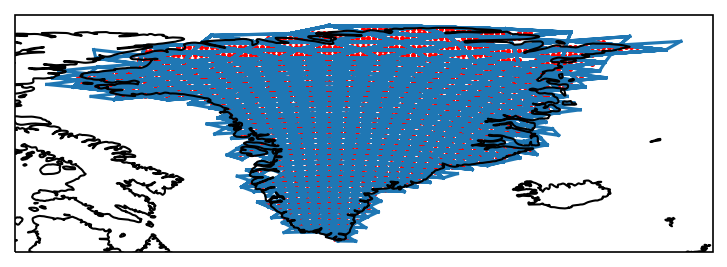

In [24]:
# Plot the trixel associated with the spatial index value
figax = hello_plot(sids,show=False)
# figax = add_coastlines(figax_container(plt.subplots(subplot_kw={'projection':proj,'transform':transf})))

# Plot the geolocation (lon,lat) as a red dot.
figax.ax.scatter(lons,lats,s=2,c='r')
plt.show()